In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [6]:
# load data
import pandas as pd
# load data
df=pd.read_csv('Datasets/Range-Queries-Aggregates.csv', header = None)

# drop nan 
df = df.dropna()
# the head of df
df.head()

C:\Users\a.berrouachedi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7
1,0.0,1159191.2534425869,1894755.9479944962,5225.375665408865,2981.728430851036,96046.0,34927.0,1111.618901359765
2,1.0,1159292.8813126972,1898921.8116983562,3499.1760066940237,6879.352245114315,152668.0,54847.0,1192.855948856342
3,3.0,1160320.6485057026,1903776.287878814,6495.79677979487,854.8982774187427,22297.0,5082.0,1260.0946764138673
4,5.0,1159842.6380646185,1904820.9696641604,1376.3808000432798,10049.53403083562,99570.0,28239.0,1311.296002812092
5,6.0,1161388.6486333353,1899014.8728412392,4047.4088991705153,7855.3467486600075,161713.0,48617.0,1218.767773772053


In [4]:
# df to values
df = df.values
Y = df[:,22]
X = df[:,0:22]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(7588, 22, 1)


In [5]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
x_test.shape

(1518, 22, 1)

In [7]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [8]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [9]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 6070 samples, validate on 1518 samples
Epoch 1/250
6070/6070 [==============================] - 4s 591us/step - loss: 27.2271 - val_loss: 3.4096
Epoch 2/250
6070/6070 [==============================] - 4s 609us/step - loss: 7.1933 - val_loss: 6.0591
Epoch 3/250
6070/6070 [==============================] - 4s 588us/step - loss: 5.5423 - val_loss: 5.4222
Epoch 4/250
6070/6070 [==============================] - 3s 547us/step - loss: 5.2079 - val_loss: 1.4058
Epoch 5/250
6070/6070 [==============================] - 3s 562us/step - loss: 4.7571 - val_loss: 7.1769
Epoch 6/250
6070/6070 [==============================] - 3s 550us/step - loss: 4.5229 - val_loss: 2.6417
Epoch 7/250
6070/6070 [==============================] - 3s 540us/step - loss: 4.2945 - val_loss: 1.5281
Epoch 8/250
6070/6070 [==============================] - 4s 585us/step - loss: 3.6945 - val_loss: 5.4722
Epoch 9/250
6070/6070 [=====

Epoch 70/250
6070/6070 [==============================] - 3s 540us/step - loss: 2.3219 - val_loss: 1.9311
Epoch 71/250
6070/6070 [==============================] - 3s 539us/step - loss: 2.3043 - val_loss: 2.1115
Epoch 72/250
6070/6070 [==============================] - 3s 552us/step - loss: 2.2389 - val_loss: 1.3971
Epoch 73/250
6070/6070 [==============================] - 3s 559us/step - loss: 2.2976 - val_loss: 1.8300
Epoch 74/250
6070/6070 [==============================] - 4s 589us/step - loss: 2.2791 - val_loss: 1.8978
Epoch 75/250
6070/6070 [==============================] - 3s 533us/step - loss: 2.1717 - val_loss: 2.1323
Epoch 76/250
6070/6070 [==============================] - 3s 538us/step - loss: 2.2278 - val_loss: 1.8700
Epoch 77/250
6070/6070 [==============================] - 3s 538us/step - loss: 2.2902 - val_loss: 1.9697
Epoch 78/250
6070/6070 [==============================] - 4s 581us/step - loss: 2.2419 - val_loss: 2.4733
Epoch 79/250
6070/6070 [======================

Epoch 147/250
6070/6070 [==============================] - 3s 541us/step - loss: 1.7468 - val_loss: 1.5551
Epoch 148/250
6070/6070 [==============================] - 3s 544us/step - loss: 1.8420 - val_loss: 1.4764
Epoch 149/250
6070/6070 [==============================] - 4s 577us/step - loss: 1.7536 - val_loss: 1.4738
Epoch 150/250
6070/6070 [==============================] - 3s 544us/step - loss: 1.7807 - val_loss: 1.5668
Epoch 151/250
6070/6070 [==============================] - 3s 538us/step - loss: 1.7875 - val_loss: 1.5617
Epoch 152/250
6070/6070 [==============================] - 3s 533us/step - loss: 1.8151 - val_loss: 1.8926
Epoch 153/250
6070/6070 [==============================] - 3s 535us/step - loss: 1.8057 - val_loss: 2.1778
Epoch 154/250
6070/6070 [==============================] - 3s 574us/step - loss: 1.7219 - val_loss: 1.5968
Epoch 155/250
6070/6070 [==============================] - 3s 541us/step - loss: 1.7407 - val_loss: 1.9687
Epoch 156/250
6070/6070 [============

In [10]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

6070/6070 [==============================] - 0s 43us/step
 Model.evaluate :  1.5372572439309988 

Mean Squa Error : 1.518372829448328
Mean Abso Error : 1.0120448725653888
Expl. Variance  : 0.8264060394645802


In [11]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 20, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 128)            24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

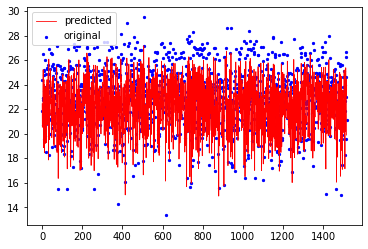

In [12]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

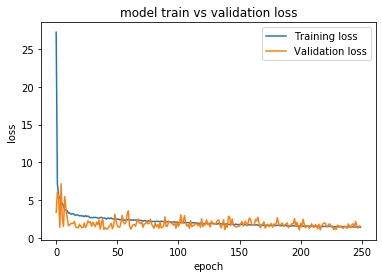

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [14]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [15]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [16]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (6070, 1)
Training Labels (from CNN) Shape: (6070,) 

Test Features (from CNN) Shape: (1518, 1)
Test Labels (from CNN) Shape: (1518,) 

Test Features original Shape: (6070, 22, 1)
Test Features original Shape: (1518, 22, 1)


### Classification by CNN + Random Forest + MLP

In [17]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
# epochs=optimal['epochs']

batchsize=304
learnrate=0.002474296684203603
epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.002474296684203603
Optimal # epochs:  210
Optimal batch size:  304



Epoch: 0001 cost= 2.767925431
Epoch: 0002 cost= 1.905495945
Epoch: 0003 cost= 1.115970811
Epoch: 0004 cost= 0.425604062
Epoch: 0005 cost= 0.053925295
Epoch: 0006 cost= 0.014574410
Epoch: 0007 cost= 0.010655022
Epoch: 0008 cost= 0.009452074
Epoch: 0009 cost= 0.009064087
Epoch: 0010 cost= 0.009099210
Ep

Epoch: 0207 cost= 0.003129265
Epoch: 0208 cost= 0.002992715
Epoch: 0209 cost= 0.002880140
Epoch: 0210 cost= 0.002968643
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 0.9978015204034683
Mean Abso Error : 0.7796900801979036
Expl. Variance  : 0.8290370510231779 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [18]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 0.9873143070574224
Mean Abso Error : 0.7655258183938001
Expl. Variance  : 0.8300783038898228 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 1.0734239168578779
Mean Abso Error : 0.7998967327913539
Expl. Variance  : 0.8186216994189215 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mean Squ

In [19]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

CNN XGBRegressor      
Mean Squa Error : 1.040731876091321
Mean Abso Error : 0.7859368921111538
Expl. Variance  : 0.8206772995131196 

CNN ExtraTreesRegressor      
Mean Squa Error : 1.5767925889328063
Mean Abso Error : 0.9955270092226615
Expl. Variance  : 0.7283109110768247 

CNN DecisionTreeRegressor      
Mean Squa Error : 1.8530253623188406
Mean Abso Error : 1.0783596837944665
Expl. Variance  : 0.6807568594594253 



In [20]:
out_cnn_train.shape

(6070, 1)

###  MLP

In [21]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)



Epoch 1/50
6070/6070 [==============================] - 2s 287us/step - loss: 761.6084
Epoch 2/50
6070/6070 [==============================] - 2s 270us/step - loss: 293.1778
Epoch 3/50
6070/6070 [==============================] - 2s 260us/step - loss: 277.1926
Epoch 4/50
6070/6070 [==============================] - 2s 247us/step - loss: 252.4069
Epoch 5/50
6070/6070 [==============================] - 1s 228us/step - loss: 215.1338
Epoch 6/50
6070/6070 [==============================] - 1s 232us/step - loss: 161.1319
Epoch 7/50
6070/6070 [==============================] - 2s 257us/step - loss: 117.5563
Epoch 8/50
6070/6070 [==============================] - 2s 286us/step - loss: 108.9535
Epoch 9/50
6070/6070 [==============================] - 1s 231us/step - loss: 108.4077
Epoch 10/50
6070/6070 [==============================] - 1s 226us/step - loss: 108.3794
Epoch 11/50
6070/6070 [==============================] - 1s 225us/step - loss: 108.2475
Epoch 12/50
6070/6070 [================

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [22]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [23]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)

CNN RandomForestRegressor      
Mean Squa Error : 0.5576633801054021
Mean Abso Error : 0.5636080368906458
Expl. Variance  : 0.9041656367125053 

CNN XGBRegressor      
Mean Squa Error : 0.38267092668941083
Mean Abso Error : 0.4753349728892129
Expl. Variance  : 0.9343170226893436 

CNN ExtraTreesRegressor      
Mean Squa Error : 0.557199209486166
Mean Abso Error : 0.5580368906455863
Expl. Variance  : 0.904366559604305 



In [24]:
FFFFF

NameError: name 'FFFFF' is not defined

# XGBRegressor

In [ ]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC


clf = LinearRegression()
clf.fit(trainingData, trainingScores)
print("LinearRegression")
print(clf.predict(predictionData))

clf = svm.SVR()
clf.fit(trainingData, trainingScores)
print("SVR")
print(clf.predict(predictionData))

clf = LogisticRegression()
clf.fit(trainingData, trainingScores)
print("LogisticRegression")
print(clf.predict(predictionData))

clf = DecisionTreeClassifier()
clf.fit(trainingData, trainingScores)
print("DecisionTreeClassifier")
print(clf.predict(predictionData))

clf = KNeighborsClassifier()
clf.fit(trainingData, trainingScores)
print("KNeighborsClassifier")
print(clf.predict(predictionData))

clf = LinearDiscriminantAnalysis()
clf.fit(trainingData, trainingScores)
print("LinearDiscriminantAnalysis")
print(clf.predict(predictionData))

clf = GaussianNB()
clf.fit(trainingData, trainingScores)
print("GaussianNB")
print(clf.predict(predictionData))

clf = SVC()
clf.fit(trainingData, trainingScores)
print("SVC")
print(clf.predict(predictionData))